# Prática 01 - Utilização de extrator para imagens e uso do k-NN

## Descrição: Atividade em grupo que visa a utilização de extratores de características de imagem, criação de diferentes versões de bases processadas, e por último, utilização da técnica k-NN.

### Autores: Mariana Emerenciano Miranda, Arthur Ferreira de Holanda, Artur Revoredo Pinto

#Introdução

* A identificação de objetos em imagens tem se tornado um desafio interessante. A partir disso, sua aplicação tem sido verificada em várias de interesse. Dentre os descritores de características mais utilizados estão o Histogram of Oriented Gradients (HOG) e a Convolutional Neural Network (CNN).

* O descritor HOG pode ser visto como um descritor de gradientes ou das direções das bordas, e tem aplicação em uma série de tarefas e pode ser usado em diversas linguagens, como C++, Python, Java através de bibliotecas como OpenCV ou Scikit-image.

* A Rede Neural Convolucional é um algoritmo de Deep Learning desenvolvido para trabalhar com imagens e vídeos. Ela recebe imagens como entradas, extrai e aprende os recursos da imagem, e classifica com base nos recursos aprendidos. Visando a elaboração do projeto da disciplina de Aprendizado de Máquina, escolheu-se uma base de imagens de pets (cachorros e gatos) que pode ser acessa através do seguinte link: https://www.robots.ox.ac.uk/~vgg/data/pets/

# Descrição da atividade

Para a extração de características das referidas imagens, cada grupo deverá seguir a seguinte
metodologia:
1. Ler as imagens baixadas do site de acordo com o sorteio feito em sala de aula;
2. Redefinir o tamanho de cada uma delas para 256 x 256 pixels e 128 x 128 pixels;
3. Aplicar o algoritmo de HOG para gerar quatro versões diferentes das imagens, utilizando as seguintes configurações: (as configurações estão neste notebook);
4. Salvar os quatro datasets originários da transformação (em CSV), contendo +/- 800 imagens, sendo 400 imagens de cachorros e 400 imagens de gatos de acordo com o sorteio de cada grupo;
5. Aplicar os modelos treinados de CNN (VGG16 e VGG19) nas 800 imagens de cada grupo, explorando os valores para pooling (‘avg’ e ‘max’), além de redefinir o tamanho de cada uma das imagens para 256 x 256 pixels e 128 x 128 pixels utilizando as configurações abaixo: (as configurações estão neste notebook);
6. De posse das doze (12) bases de dados (quatro obtidas através da utilização do HOG, quatro
obtidas através do VGG16 e quatro obtidas através do VGG19), utilize as seguintes opções de treinamento e teste:
  * 10-fold cross-validation;
  * split-percentage: 70/30.

Na sequência, execute experimentos com a técnica k-NN (nearest neighbors), de tal forma que você possa escolher diferentes valores para alguns parâmetros pertencentes às técnicas estudadas.

Para o k-NN, você poderá variar o número de vizinhos de 1 a 10 (ou qualquer intervalo), de acordo com a Figura 1. Para cada execução, de acordo com os valores de k e referentes a cada uma das opções de treinamento e teste, guarde o resultado da acurácia na célula correspondente, como mostra a figura abaixo. Por último, calcule a média e o desvio padrão para cada valor de k.

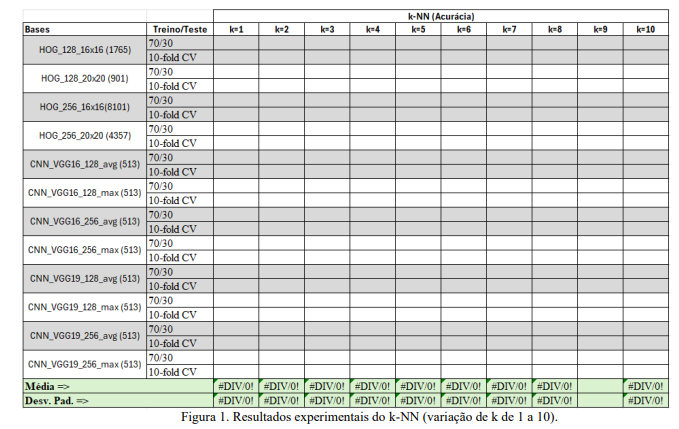


De posse dos valores dos experimentos, escolha os seis melhores e suas respectivas bases. Para essas, aplique o método PCA com 10 componentes de tal forma que obterá como resultante seis novas bases. Ao final, você terá doze (12) bases, sendo seis originadas através do HOG e CNN e seis através do PCA. Altere a planilha (Figura 1), de forma que as novas seis bases possam tomar os
lugares das seis piores, e na sequência, execute os experimentos para as novas

# Carregando as bases HOG e CNN

In [2]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import cv2

## HOGs (Acurácias)

In [3]:
hog_128_16 = pd.read_csv('/content/CSVs/hog_features_128_16.csv')

In [4]:
hog_128_20 = pd.read_csv('/content/CSVs/hog_features_128_20.csv')

In [5]:
hog_256_16 = pd.read_csv('/content/CSVs/hog_features_256_16.csv')

In [6]:
hog_256_20 = pd.read_csv('/content/CSVs/hog_features_256_20.csv')

In [7]:
def divisao_holdout(base_original):
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = base_original.select_dtypes(include=tipos_numericos)
  colunas_numericas = list(cols_num.columns)

  features_base_original = base_original[colunas_numericas]
  labels_base_original = base_original['label']

  X_train, X_test, y_train, y_test = train_test_split(features_base_original, labels_base_original, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test


In [8]:
def divisao_X_e_y(base_original):
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = base_original.select_dtypes(include=tipos_numericos)
  colunas_numericas = list(cols_num.columns)

  features= base_original[colunas_numericas]
  labels = base_original['label']

  return features, labels

In [9]:
features_hog_128_16, labels_hog_128_16 = divisao_X_e_y(hog_128_16)

features_hog_256_16, labels_hog_256_16 = divisao_X_e_y(hog_256_16)

features_hog_256_20, labels_hog_256_20 = divisao_X_e_y(hog_256_20)

features_hog_128_20, labels_hog_128_20 = divisao_X_e_y(hog_128_20)

In [10]:
X_train_hog_128_16, X_test_hog_128_16, y_train_hog_128_16, y_test_hog_128_16 = divisao_holdout(hog_128_16)

In [11]:
X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20 = divisao_holdout(hog_128_20)

In [12]:
X_train_hog_256_16, X_test_hog_256_16, y_train_hog_256_16, y_test_hog_256_16 = divisao_holdout(hog_256_16)

In [13]:
X_train_hog_256_20, X_test_hog_256_20, y_train_hog_256_20, y_test_hog_256_20 = divisao_holdout(hog_256_20)

In [14]:
# Função para executar o k-NN com holdout 70/30
def evaluate_knn(X_train, X_test, y_train, y_test, max_k=10):
    accuracies = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    return accuracies

In [18]:
# Função para executar k-NN com 10-fold cross-validation
def evaluate_knn_cv(X, y, max_k=10):
    accuracies = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        # Executa a validação cruzada de 10 folds para o valor de k
        cv_score = cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean()
        accuracies.append(cv_score)
    return accuracies

kf = KFold(n_splits=10, shuffle=True, random_state=42)

### HOG 128 16

In [16]:
#Holdout
accuracies_hog_128_16_holdout = evaluate_knn(X_train_hog_128_16, X_test_hog_128_16, y_train_hog_128_16, y_test_hog_128_16)
print("Acurácias para diferentes valores de k:", accuracies_hog_128_16_holdout)

Acurácias para diferentes valores de k: [0.401673640167364, 0.3723849372384937, 0.401673640167364, 0.39330543933054396, 0.3682008368200837, 0.3807531380753138, 0.37656903765690375, 0.3723849372384937, 0.35564853556485354, 0.3598326359832636]


In [19]:
#Tenfold Cross-Val
accuracies_hog_128_16_10fold = evaluate_knn_cv(features_hog_128_16, labels_hog_128_16, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_hog_128_16_10fold)

Acurácias para diferentes valores de k: [0.40181962025316453, 0.3866613924050633, 0.38537974683544307, 0.3563924050632911, 0.3463132911392405, 0.34504746835443034, 0.34251582278481013, 0.33617088607594936, 0.3374841772151899, 0.3286392405063291]


### HOG 128 20

In [20]:
#Holdout
accuracies_hog_128_20_holdout = evaluate_knn(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20)
print("Acurácias para diferentes valores de k:", accuracies_hog_128_20_holdout)

Acurácias para diferentes valores de k: [0.4100418410041841, 0.39748953974895396, 0.4476987447698745, 0.4100418410041841, 0.42677824267782427, 0.401673640167364, 0.37656903765690375, 0.39748953974895396, 0.41422594142259417, 0.41841004184100417]


In [21]:
#Tenfold Cross-Val
accuracies_hog_128_20_10fold = evaluate_knn_cv(features_hog_128_20, labels_hog_128_20, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_hog_128_20_10fold)

Acurácias para diferentes valores de k: [0.42705696202531646, 0.41319620253164563, 0.40944620253164565, 0.39292721518987345, 0.4004746835443038, 0.38917721518987347, 0.3953955696202532, 0.3916772151898734, 0.39295886075949366, 0.39545886075949366]


### HOG 256 16

In [23]:
#Holdout
accuracies_hog_256_16_holdout = evaluate_knn(X_train_hog_256_16, X_test_hog_256_16, y_train_hog_256_16, y_test_hog_256_16)
print("Acurácias para diferentes valores de k:", accuracies_hog_256_16_holdout)

Acurácias para diferentes valores de k: [0.33472803347280333, 0.3179916317991632, 0.35564853556485354, 0.33472803347280333, 0.3472803347280335, 0.33472803347280333, 0.3305439330543933, 0.3263598326359833, 0.3472803347280335, 0.3054393305439331]


In [24]:
#Tenfold Cross-Val
accuracies_hog_256_16_10fold = evaluate_knn_cv(features_hog_256_16, labels_hog_256_16, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_hog_256_16_10fold)

Acurácias para diferentes valores de k: [0.3325316455696203, 0.32495253164556964, 0.33626582278481015, 0.3009018987341772, 0.3260917721518987, 0.3110443037974684, 0.31854430379746834, 0.3009493670886076, 0.31354430379746834, 0.3046835443037975]


### HOG 256 20

In [25]:
#Holdout
accuracies_hog_256_20_holdout = evaluate_knn(X_train_hog_256_20, X_test_hog_256_20, y_train_hog_256_20, y_test_hog_256_20)
print("Acurácias para diferentes valores de k:", accuracies_hog_256_20_holdout)

Acurácias para diferentes valores de k: [0.3389121338912134, 0.3389121338912134, 0.3682008368200837, 0.3263598326359833, 0.3389121338912134, 0.32217573221757323, 0.30962343096234307, 0.3389121338912134, 0.3472803347280335, 0.3305439330543933]


In [26]:
#Tenfold Cross-Val

accuracies_hog_256_20_10fold = evaluate_knn_cv(features_hog_256_20, labels_hog_256_20, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_hog_256_20_10fold)

Acurácias para diferentes valores de k: [0.35765822784810125, 0.35386075949367085, 0.3640189873417721, 0.32245253164556964, 0.32743670886075954, 0.3160601265822785, 0.30851265822784807, 0.318623417721519, 0.3161550632911392, 0.31610759493670887]


## PCA nos HOGs 128_16, 256_16 e 256_20

In [27]:
from sklearn.decomposition import PCA

pca_obj = PCA(n_components=10)
pca_result = pca_obj.fit_transform(features_hog_128_16)

In [28]:
print(pca_result)

[[ 0.4121375   1.1318112   0.09575656 ...  0.05043785  0.03869441
  -0.14407954]
 [-0.08282583  0.59086767  0.70941538 ...  0.03828934  0.440849
   0.29008809]
 [-0.56157823  0.76318068  0.64258474 ...  0.19316751  0.08855494
  -0.0383727 ]
 ...
 [ 0.52878438  0.63609893 -0.59261918 ...  0.10825739  0.35927048
  -0.3048063 ]
 [ 0.66803566 -0.10335987 -0.10257625 ...  0.02805937 -0.52036338
  -0.26929285]
 [ 0.72508759 -0.3659891   0.05855347 ... -0.41691661  0.46878115
  -0.49011547]]


In [29]:
i = 1
atributos = []
while i <= pca_result.shape[1]:
  atributos.append('pca_'+str(i))
  i += 1

pca_dataset = pd.DataFrame(data = pca_result, columns = atributos)

In [30]:
## Juntando o atributo classe
final_data = pca_dataset.join(labels_hog_128_16)

# Visualização dos dados normalizados
final_data.head()

# Salvando Pessoa.csv transformado
df1 = pd.DataFrame(final_data)
df1.to_csv('hog_128_16_PCA-10.csv', index=False)

In [31]:
hog_128_16_pca = pd.read_csv('/content/hog_128_16_PCA-10.csv')
print(hog_128_16_pca.head())

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0  0.412137  1.131811  0.095757  0.314552 -0.285270  0.514424  0.069984   
1 -0.082826  0.590868  0.709415  0.032480 -0.157859  0.150719 -0.030987   
2 -0.561578  0.763181  0.642585 -0.004321 -0.333556  0.093472 -0.529813   
3 -0.682061  0.645079 -0.389950 -0.585967  0.189805 -0.326191 -0.107106   
4  1.951821  0.252818 -0.444566  0.059767 -0.387171 -0.135584  0.446666   

      pca_8     pca_9    pca_10           label  
0  0.050438  0.038694 -0.144080  english_setter  
1  0.038289  0.440849  0.290088    Egyptian_Mau  
2  0.193168  0.088555 -0.038373    Egyptian_Mau  
3 -0.605481 -0.235081 -0.271641      pomeranian  
4  0.732304  0.163854  0.208087  english_setter  


In [32]:
pca_obj_256_16 = PCA(n_components=10)
pca_result_256_16 = pca_obj.fit_transform(features_hog_256_16)

In [33]:
i = 1
atributos_256_16 = []
while i <= pca_result_256_16.shape[1]:
  atributos_256_16.append('pca_'+str(i))
  i += 1

pca_dataset_256_16 = pd.DataFrame(data = pca_result_256_16, columns = atributos_256_16)

In [34]:
## Juntando o atributo classe
final_data_256_16 = pca_dataset_256_16.join(labels_hog_256_16)

# Visualização dos dados normalizados
final_data_256_16.head()

# Salvando Pessoa.csv transformado
df2 = pd.DataFrame(final_data_256_16)
df2.to_csv('hog_256_16_PCA-10.csv', index=False)

In [35]:
hog_256_16_pca = pd.read_csv('/content/hog_256_16_PCA-10.csv')
print(hog_256_16_pca.head())

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0  1.487550 -1.913213  0.876976  0.153866  0.387547  0.976038 -0.179434   
1 -1.166421 -1.597374 -0.960456  0.126529  0.335676  0.121695 -0.479582   
2 -4.016847 -1.625431 -0.163869 -0.152634  0.503968  0.002788  0.211925   
3 -1.649629 -0.982624  0.572889  0.005034 -0.791413 -0.093488  0.069436   
4  3.990570 -1.081060  0.840398  0.230561  0.357224  0.429833 -0.291094   

      pca_8     pca_9    pca_10           label  
0 -0.393331 -0.030383 -0.037651  english_setter  
1  0.055614 -1.636716  0.015594    Egyptian_Mau  
2 -0.468290 -0.524121  0.035133    Egyptian_Mau  
3 -0.126951  0.038597 -1.012432      pomeranian  
4  1.093582 -0.316568  0.724490  english_setter  


In [36]:
pca_obj_256_20 = PCA(n_components=10)
pca_result_256_20 = pca_obj.fit_transform(features_hog_256_20)

In [37]:
i = 1
atributos_256_20 = []
while i <= pca_result_256_20.shape[1]:
  atributos_256_20.append('pca_'+str(i))
  i += 1

pca_dataset_256_20 = pd.DataFrame(data = pca_result_256_20, columns = atributos_256_20)

In [38]:
## Juntando o atributo classe
final_data_256_20 = pca_dataset_256_20.join(labels_hog_256_20)

# Visualização dos dados normalizados
final_data_256_20.head()

# Salvando Pessoa.csv transformado
df3 = pd.DataFrame(final_data_256_20)
df3.to_csv('hog_256_20_PCA-10.csv', index=False)

In [39]:
hog_256_20_pca = pd.read_csv('/content/hog_256_20_PCA-10.csv')
print(hog_256_20_pca.head())

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0  1.209065  1.436163  0.492915  0.141626  0.379233 -0.535403  0.276380   
1 -0.899520  1.084630 -0.671370 -0.084669  0.121994 -0.586105  0.357158   
2 -2.937791  1.103864 -0.309854  0.208676 -0.201785 -0.255380  0.469048   
3 -1.431623  0.475983  0.338426 -0.199732  0.325553  0.432579 -0.341658   
4  2.974520  0.797263  0.778985  0.126934  0.176284 -0.222178 -0.280853   

      pca_8     pca_9    pca_10           label  
0 -0.132949  0.346885 -0.059257  english_setter  
1  0.184391 -0.892595  0.238534    Egyptian_Mau  
2  0.084548 -0.173082  0.212983    Egyptian_Mau  
3 -0.932431 -0.273725  0.297998      pomeranian  
4  1.045549 -0.259465 -0.147268  english_setter  


## HOGs PCA (Acurácias)

In [40]:
# Features e labels
features_hog_128_16_pca, labels_hog_128_16_pca = divisao_X_e_y(hog_128_16_pca)

features_hog_256_20_pca, labels_hog_256_20_pca = divisao_X_e_y(hog_256_20_pca)

features_hog_256_16_pca, labels_hog_256_16_pca = divisao_X_e_y(hog_256_16_pca)

In [41]:
X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca = divisao_holdout(hog_128_16_pca)

X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca = divisao_holdout(hog_256_16_pca)

X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca = divisao_holdout(hog_256_20_pca)

In [42]:
accuracies_hog_128_16_pca_holdout = evaluate_knn(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca)
print("Acurácias para diferentes valores de k:", accuracies_hog_128_16_pca_holdout)

Acurácias para diferentes valores de k: [0.401673640167364, 0.41422594142259417, 0.38493723849372385, 0.4476987447698745, 0.4769874476987448, 0.4769874476987448, 0.4895397489539749, 0.49372384937238495, 0.4895397489539749, 0.49372384937238495]


In [43]:
accuracies_hog_128_16_pca_10fold = evaluate_knn_cv(features_hog_128_16_pca, labels_hog_128_16_pca, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_hog_128_16_pca_10fold)

Acurácias para diferentes valores de k: [0.44960443037974684, 0.4395094936708861, 0.433259493670886, 0.45469936708860753, 0.46207278481012654, 0.4645886075949367, 0.45829113924050635, 0.4846993670886076, 0.46580696202531646, 0.46580696202531646]


In [44]:
accuracies_hog_256_16_pca_holdout = evaluate_knn(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca)
print("Acurácias para diferentes valores de k:", accuracies_hog_256_16_pca_holdout)

Acurácias para diferentes valores de k: [0.45188284518828453, 0.4309623430962343, 0.41422594142259417, 0.41841004184100417, 0.42677824267782427, 0.4225941422594142, 0.4476987447698745, 0.41841004184100417, 0.45188284518828453, 0.47280334728033474]


In [45]:
accuracies_hog_256_16_pca_10fold = evaluate_knn_cv(features_hog_256_16_pca, labels_hog_256_16_pca, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_hog_256_16_pca_10fold)

Acurácias para diferentes valores de k: [0.3814082278481013, 0.4079113924050633, 0.4067721518987343, 0.43449367088607593, 0.45340189873417713, 0.4471360759493671, 0.4394145569620253, 0.43431962025316456, 0.4445094936708861, 0.43061708860759496]


In [46]:
accuracies_hog_256_20_pca_holdout = evaluate_knn(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca)
print("Acurácias para diferentes valores de k:", accuracies_hog_256_20_pca_holdout)

Acurácias para diferentes valores de k: [0.42677824267782427, 0.401673640167364, 0.4435146443514644, 0.4686192468619247, 0.4602510460251046, 0.4769874476987448, 0.497907949790795, 0.4769874476987448, 0.5230125523012552, 0.5062761506276151]


In [47]:
accuracies_hog_256_20_pca_10fold = evaluate_knn_cv(features_hog_256_20_pca, labels_hog_256_20_pca, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_hog_256_20_pca_10fold)

Acurácias para diferentes valores de k: [0.43446202531645567, 0.43825949367088607, 0.4595727848101266, 0.4961234177215189, 0.46965189873417723, 0.4759968354430379, 0.48979430379746836, 0.49237341772151905, 0.49360759493670886, 0.5011550632911392]


## CNNs (Acurácias)

In [48]:
cnn_vgg16_128_avg = pd.read_csv('/content/CSVs/cnn_VGG16_avg_128.csv')

In [49]:
cnn_vgg16_128_max = pd.read_csv('/content/CSVs/cnn_VGG16_max_128.csv')

In [50]:
cnn_vgg16_256_avg = pd.read_csv('/content/CSVs/cnn_VGG16_avg_256.csv')

In [51]:
cnn_vgg16_256_max = pd.read_csv('/content/CSVs/cnn_VGG16_max_256.csv')

In [52]:
cnn_vgg19_128_avg = pd.read_csv('/content/CSVs/cnn_VGG19_avg_128.csv')

In [53]:
cnn_vgg19_128_max = pd.read_csv('/content/CSVs/cnn_VGG19_max_128.csv')

In [54]:
cnn_vgg19_256_avg = pd.read_csv('/content/CSVs/cnn_VGG19_avg_256.csv')

In [55]:
cnn_vgg19_256_max = pd.read_csv('/content/CSVs/cnn_VGG19_max_256.csv')

In [56]:
import pandas as pd
import os

# Função para processar características CNN e mapear labels a partir do 'filename'
def process_cnn_features(csv_path, label_map, dog_cat=False):
    try:
        # Carregar o CSV
        df = pd.read_csv(csv_path)

        # Verificar se a coluna 'filename' existe
        if 'filename' not in df.columns:
            raise ValueError("CSV não contém a coluna 'filename'")

        labels = []
        for filename in df['filename']:
            # Define a label com base no prefixo do nome do arquivo
            label = None
            for species in label_map:
                if filename.startswith(species):
                    label = species
                    break
            if not label:
                labels.append("Unknown")  # Define "Unknown" se não houver label correspondente
            else:
                labels.append(label)

        # Adicionar a coluna de labels ao DataFrame
        df['label'] = labels

        # Mapear para "Dog" ou "Cat" se `dog_cat` for True
        if dog_cat:
            species_map = {
                "Sphynx": "Cat",
                "Egyptian_Mau": "Cat",
                "pomeranian": "Dog",
                "english_setter": "Dog"
            }
            df["label"] = df["label"].map(species_map)

        # Remover qualquer entrada com 'Unknown' para labels ausentes
        df = df[df['label'] != "Unknown"]

        return df  # Retorna o DataFrame com a coluna de label adicionada

    except Exception as e:
        print(f"Erro ao processar o arquivo CSV {csv_path}: {e}")
        return None


In [57]:
label_map = {
    "Sphynx",
    "Egyptian_Mau",
    "pomeranian",
    "english_setter"
}

In [60]:
cnn_vgg16_128_avg = process_cnn_features('/content/CSVs/cnn_VGG16_avg_128.csv', label_map, dog_cat=False)

cnn_vgg16_128_max = process_cnn_features('/content/CSVs/cnn_VGG16_max_128.csv', label_map, dog_cat=False)

cnn_vgg16_256_avg = process_cnn_features('/content/CSVs/cnn_VGG16_avg_256.csv', label_map, dog_cat=False)

cnn_vgg16_256_max = process_cnn_features('/content/CSVs/cnn_VGG16_max_256.csv', label_map, dog_cat=False)

cnn_vgg19_128_avg = process_cnn_features('/content/CSVs/cnn_VGG19_avg_128.csv', label_map, dog_cat=False)

cnn_vgg19_128_max = process_cnn_features('/content/CSVs/cnn_VGG19_max_128.csv', label_map, dog_cat=False)

cnn_vgg19_256_avg = process_cnn_features('/content/CSVs/cnn_VGG19_avg_256.csv', label_map, dog_cat=False)

cnn_vgg19_256_max = process_cnn_features('/content/CSVs/cnn_VGG19_max_256.csv', label_map, dog_cat=False)

In [61]:
X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg = divisao_holdout(cnn_vgg16_128_avg)
X_train_vgg16_128_max, X_test_vgg16_128_max, y_train_vgg16_128_max, y_test_vgg16_128_max = divisao_holdout(cnn_vgg16_128_max)
X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg = divisao_holdout(cnn_vgg16_256_avg)
X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max = divisao_holdout(cnn_vgg16_256_max)

X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg = divisao_holdout(cnn_vgg19_128_avg)
X_train_vgg19_128_max, X_test_vgg19_128_max, y_train_vgg19_128_max, y_test_vgg19_128_max = divisao_holdout(cnn_vgg19_128_max)
X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg = divisao_holdout(cnn_vgg19_256_avg)
X_train_vgg19_256_max, X_test_vgg19_256_max, y_train_vgg19_256_max_, y_test_vgg19_256_max = divisao_holdout(cnn_vgg19_256_max)

In [62]:
features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg = divisao_X_e_y(cnn_vgg16_128_avg)
features_cnn_vgg16_128_max, labels_cnn_vgg16_128_max = divisao_X_e_y(cnn_vgg16_128_max)
features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg = divisao_X_e_y(cnn_vgg16_256_avg)
features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max = divisao_X_e_y(cnn_vgg16_256_max)

features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg = divisao_X_e_y(cnn_vgg19_128_avg)
features_cnn_vgg19_128_max, labels_cnn_vgg19_128_max = divisao_X_e_y(cnn_vgg19_128_max)
features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg = divisao_X_e_y(cnn_vgg19_256_avg)
features_cnn_vgg19_256_max, labels_cnn_vgg19_256_max = divisao_X_e_y(cnn_vgg19_256_max)

In [63]:
accuracies_cnn_VGG16_128_avg_holdout = evaluate_knn(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_128_avg_holdout)

Acurácias para diferentes valores de k: [0.3445378151260504, 0.31932773109243695, 0.3445378151260504, 0.37815126050420167, 0.4117647058823529, 0.38235294117647056, 0.4117647058823529, 0.3865546218487395, 0.39915966386554624, 0.40336134453781514]


In [64]:
accuracies_cnn_VGG16_128_avg_10fold = evaluate_knn_cv(features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_128_avg_10fold)

Acurácias para diferentes valores de k: [0.37768987341772153, 0.35621835443037975, 0.38392405063291146, 0.383876582278481, 0.39506329113924055, 0.3875474683544304, 0.4039082278481013, 0.39768987341772155, 0.404003164556962, 0.40916139240506333]


In [65]:
accuracies_cnn_VGG16_128_max_holdout = evaluate_knn(X_train_vgg16_128_max, X_test_vgg16_128_max, y_train_vgg16_128_max, y_test_vgg16_128_max)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_128_max_holdout)

Acurácias para diferentes valores de k: [0.3487394957983193, 0.3487394957983193, 0.36134453781512604, 0.36554621848739494, 0.35294117647058826, 0.33613445378151263, 0.37815126050420167, 0.37815126050420167, 0.35714285714285715, 0.3487394957983193]


In [66]:
accuracies_cnn_VGG16_128_max_10fold = evaluate_knn_cv(features_cnn_vgg16_128_max, labels_cnn_vgg16_128_max, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_128_max_10fold)

Acurácias para diferentes valores de k: [0.36867088607594933, 0.3485284810126582, 0.37495253164556963, 0.3800474683544304, 0.38762658227848107, 0.3813449367088607, 0.39139240506329115, 0.40400316455696206, 0.4027056962025317, 0.4040348101265823]


In [67]:
accuracies_cnn_VGG16_256_avg_holdout = evaluate_knn(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_256_avg_holdout)

Acurácias para diferentes valores de k: [0.40336134453781514, 0.39915966386554624, 0.46638655462184875, 0.4327731092436975, 0.4495798319327731, 0.4327731092436975, 0.42857142857142855, 0.44537815126050423, 0.4495798319327731, 0.4495798319327731]


In [68]:
accuracies_cnn_VGG16_256_avg_10fold = evaluate_knn_cv(features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_256_avg_10fold)

Acurácias para diferentes valores de k: [0.4483544303797468, 0.4255696202531646, 0.4760601265822785, 0.46344936708860757, 0.4811550632911392, 0.47859177215189874, 0.47479430379746834, 0.4849367088607595, 0.4723575949367088, 0.4647151898734177]


In [69]:
accuracies_cnn_VGG16_256_max_holdout = evaluate_knn(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_256_max_holdout)

Acurácias para diferentes valores de k: [0.38235294117647056, 0.3487394957983193, 0.39915966386554624, 0.35294117647058826, 0.40336134453781514, 0.39915966386554624, 0.3949579831932773, 0.38235294117647056, 0.3949579831932773, 0.40336134453781514]


In [70]:
accuracies_cnn_VGG16_256_max_10fold = evaluate_knn_cv(features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_256_max_10fold)

Acurácias para diferentes valores de k: [0.40406645569620253, 0.3863132911392405, 0.41283227848101267, 0.3989715189873418, 0.41042721518987346, 0.41419303797468354, 0.4280537974683544, 0.434367088607595, 0.41916139240506334, 0.43431962025316456]


In [71]:
accuracies_cnn_VGG19_128_avg_holdout = evaluate_knn(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_128_avg_holdout)

Acurácias para diferentes valores de k: [0.3403361344537815, 0.2857142857142857, 0.3445378151260504, 0.3697478991596639, 0.36554621848739494, 0.3907563025210084, 0.41596638655462187, 0.41596638655462187, 0.3865546218487395, 0.41596638655462187]


In [72]:
accuracies_cnn_VGG19_128_avg_10fold = evaluate_knn_cv(features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_128_avg_10fold)

Acurácias para diferentes valores de k: [0.38132911392405067, 0.36501582278481015, 0.37001582278481016, 0.3940348101265823, 0.4002373417721519, 0.42427215189873413, 0.4229746835443039, 0.4178322784810127, 0.399003164556962, 0.4065664556962026]


In [73]:
accuracies_cnn_VGG19_128_max_holdout = evaluate_knn(X_train_vgg19_128_max, X_test_vgg19_128_max, y_train_vgg19_128_max, y_test_vgg19_128_max)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_128_max_holdout)

Acurácias para diferentes valores de k: [0.38235294117647056, 0.3739495798319328, 0.36134453781512604, 0.3445378151260504, 0.3697478991596639, 0.39915966386554624, 0.38235294117647056, 0.3739495798319328, 0.39915966386554624, 0.33613445378151263]


In [74]:
accuracies_cnn_VGG19_128_max_10fold = evaluate_knn_cv(features_cnn_vgg19_128_max, labels_cnn_vgg19_128_max, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_128_max_10fold)

Acurácias para diferentes valores de k: [0.38015822784810127, 0.337120253164557, 0.38768987341772154, 0.3687816455696203, 0.3750949367088608, 0.375126582278481, 0.3965348101265823, 0.40528481012658224, 0.3978164556962026, 0.40544303797468356]


In [75]:
accuracies_cnn_VGG19_256_avg_holdout = evaluate_knn(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_256_avg_holdout)

Acurácias para diferentes valores de k: [0.4117647058823529, 0.39915966386554624, 0.4117647058823529, 0.4579831932773109, 0.47478991596638653, 0.4831932773109244, 0.47478991596638653, 0.4831932773109244, 0.47058823529411764, 0.49159663865546216]


In [76]:
accuracies_cnn_VGG19_256_avg_10fold = evaluate_knn_cv(features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_256_avg_10fold)

Acurácias para diferentes valores de k: [0.4003481012658228, 0.37884493670886077, 0.40773734177215193, 0.4178322784810127, 0.4619462025316456, 0.450617088607595, 0.45321202531645566, 0.4569145569620254, 0.46200949367088606, 0.4531645569620254]


In [77]:
accuracies_cnn_VGG19_256_max_holdout = evaluate_knn(X_train_vgg19_256_max, X_test_vgg19_256_max, y_train_vgg19_256_max_, y_test_vgg19_256_max)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_256_max_holdout)

Acurácias para diferentes valores de k: [0.35294117647058826, 0.31932773109243695, 0.3445378151260504, 0.38235294117647056, 0.3697478991596639, 0.35294117647058826, 0.35714285714285715, 0.3907563025210084, 0.33613445378151263, 0.3235294117647059]


In [78]:
accuracies_cnn_VGG19_256_max_10fold = evaluate_knn_cv(features_cnn_vgg19_256_max, labels_cnn_vgg19_256_max, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_256_max_10fold)

Acurácias para diferentes valores de k: [0.36371835443037975, 0.3485284810126582, 0.35610759493670885, 0.37995253164556964, 0.36101265822784806, 0.36359177215189875, 0.38511075949367085, 0.38397151898734183, 0.37501582278481016, 0.37]


## PCA nas CNNs

In [79]:
from sklearn.decomposition import PCA

pca_obj_cnn_VGG16_max_128 = PCA(n_components=10)
pca_result_cnn_VGG16_max_128 = pca_obj_cnn_VGG16_max_128.fit_transform(features_cnn_vgg16_128_max)

In [80]:
i = 1
atributos_cnn_VGG16_max_128 = []
while i <= pca_result_cnn_VGG16_max_128.shape[1]:
  atributos_cnn_VGG16_max_128.append('pca_'+str(i))
  i += 1

pca_dataset_cnn_VGG16_max_128 = pd.DataFrame(data = pca_result_cnn_VGG16_max_128, columns = atributos_cnn_VGG16_max_128)

In [81]:
## Juntando o atributo classe
final_data_cnn_VGG16_max_128 = pca_dataset_cnn_VGG16_max_128.join(labels_cnn_vgg16_128_max)
1
# Visualização dos dados normalizados
final_data_cnn_VGG16_max_128.head()

# Salvando Pessoa.csv transformado
df1 = pd.DataFrame(final_data_cnn_VGG16_max_128)
df1.to_csv('cnn_VGG16_max_128_PCA-10.csv', index=False)

In [97]:
cnn_vgg16_128_max_pca = pd.read_csv('/content/cnn_VGG16_max_128_PCA-10.csv')
print(cnn_vgg16_max_128_pca.head())

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0 -1.447070  1.221684  0.819275 -0.455517  0.417140  0.433594  0.198041   
1  1.013075 -0.415101 -0.101023  0.083897  0.286211 -0.206285  0.148274   
2 -0.033295  0.360801 -0.474221 -0.076960  0.299915 -0.024847 -0.127187   
3  1.383592 -0.303250  0.231021  0.172562  0.165973  0.032295  0.051769   
4 -0.250983 -1.112711 -0.014650  0.154855  0.099288 -0.016016  0.072111   

      pca_8     pca_9    pca_10           label  
0 -0.074609  0.316009 -0.088616  english_setter  
1  0.127176  0.003643 -0.105096    Egyptian_Mau  
2 -0.363006  0.017138  0.004411    Egyptian_Mau  
3 -0.106059  0.090510 -0.077217      pomeranian  
4 -0.355279  0.197047 -0.026462  english_setter  


In [83]:
from sklearn.decomposition import PCA

pca_obj_cnn_VGG19_max_128 = PCA(n_components=10)
pca_result_cnn_VGG19_max_128 = pca_obj_cnn_VGG19_max_128.fit_transform(features_cnn_vgg19_128_max)

In [84]:
i = 1
atributos_cnn_VGG19_max_128 = []
while i <= pca_result_cnn_VGG19_max_128.shape[1]:
  atributos_cnn_VGG19_max_128.append('pca_'+str(i))
  i += 1

pca_dataset_cnn_VGG19_max_128 = pd.DataFrame(data = pca_result_cnn_VGG19_max_128, columns = atributos_cnn_VGG19_max_128)

In [85]:
## Juntando o atributo classe
final_data_cnn_VGG19_max_128 = pca_dataset_cnn_VGG19_max_128.join(labels_cnn_vgg19_128_max)

# Visualização dos dados normalizados
final_data_cnn_VGG19_max_128.head()

# Salvando Pessoa.csv transformado
df2 = pd.DataFrame(final_data_cnn_VGG19_max_128)
df2.to_csv('cnn_VGG19_max_128_PCA-10.csv', index=False)

In [96]:
cnn_vgg19_128_max_pca = pd.read_csv('/content/cnn_VGG19_max_128_PCA-10.csv')
print(cnn_vgg19_max_128_pca.head())

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0  0.115109 -0.007048  0.562693  0.130971  0.483134 -0.231735  0.175817   
1 -1.341443 -0.009438 -0.151651 -0.123652  0.133273  0.124803  0.140652   
2 -0.824849 -0.112899  0.071481 -0.213498  0.145420 -0.165451  0.070559   
3 -0.883111  0.208619 -0.207528 -0.031543 -0.005941  0.024843  0.092151   
4 -0.669082  0.175754 -0.190025 -0.016944  0.261616  0.473354 -0.050009   

      pca_8     pca_9    pca_10           label  
0 -0.366094 -0.318150  0.203692  english_setter  
1 -0.032984  0.015802 -0.086034    Egyptian_Mau  
2 -0.092892 -0.254184 -0.187559    Egyptian_Mau  
3 -0.048555 -0.046016  0.025659      pomeranian  
4  0.163461  0.012222  0.044189  english_setter  


In [87]:
from sklearn.decomposition import PCA

pca_obj_cnn_VGG19_256_max = PCA(n_components=10)
pca_result_cnn_VGG19_256_max = pca_obj_cnn_VGG19_256_max.fit_transform(features_cnn_vgg19_256_max)

In [88]:
i = 1
atributos_cnn_VGG19_256_max = []
while i <= pca_result_cnn_VGG19_256_max.shape[1]:
  atributos_cnn_VGG19_256_max.append('pca_'+str(i))
  i += 1

pca_dataset_cnn_VGG19_256_max = pd.DataFrame(data = pca_result_cnn_VGG19_256_max, columns = atributos_cnn_VGG19_256_max)

In [89]:
## Juntando o atributo classe
final_data_cnn_VGG19_256_max = pca_dataset_cnn_VGG19_256_max.join(labels_cnn_vgg19_256_max)

# Visualização dos dados normalizados
final_data_cnn_VGG19_256_max.head()

# Salvando Pessoa.csv transformado
df3 = pd.DataFrame(final_data_cnn_VGG19_256_max)
df3.to_csv('cnn_VGG19_256_max_PCA-10.csv', index=False)

In [95]:
cnn_vgg19_256_max_pca = pd.read_csv('/content/cnn_VGG19_256_max_PCA-10.csv')
print(cnn_vgg19_256_max_pca.head())

      pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0  0.479505 -0.910994  0.284759  0.659899 -0.060418 -0.337061 -0.164229   
1 -0.458957  0.018566 -0.101604 -0.043614 -0.273844 -0.039734 -0.037670   
2 -0.130904 -1.042884  0.054887 -0.270297  0.099337  0.077856  0.103517   
3 -0.625720  0.280163 -0.055439  0.188549 -0.010816  0.178695  0.028864   
4  0.286424  0.395128 -0.201299 -0.065968 -0.049397  0.295519  0.442170   

      pca_8     pca_9    pca_10           label  
0  0.438521  0.139778 -0.192008  english_setter  
1  0.101492  0.120958 -0.102346    Egyptian_Mau  
2  0.261372  0.049256 -0.238587    Egyptian_Mau  
3  0.033285 -0.057428  0.048595      pomeranian  
4  0.301876  0.078096  0.139482  english_setter  


## CNNs PCA (Acurácias)

In [98]:
features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca = divisao_X_e_y(cnn_vgg16_128_max_pca)

features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca = divisao_X_e_y(cnn_vgg19_128_max_pca)

features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca = divisao_X_e_y(cnn_vgg19_256_max_pca)

In [99]:
X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca = divisao_holdout(cnn_vgg16_128_max_pca)

X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca = divisao_holdout(cnn_vgg19_128_max_pca)

X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca = divisao_holdout(cnn_vgg19_256_max_pca)

In [100]:
accuracies_cnn_VGG16_128_max_holdout_pca = evaluate_knn(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_128_max_holdout_pca)

Acurácias para diferentes valores de k: [0.3319327731092437, 0.3487394957983193, 0.31932773109243695, 0.36554621848739494, 0.3403361344537815, 0.3403361344537815, 0.3445378151260504, 0.3445378151260504, 0.35714285714285715, 0.3277310924369748]


In [101]:
accuracies_cnn_VGG16_128_max_10fold_pca = evaluate_knn_cv(features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG16_128_max_10fold_pca)

Acurácias para diferentes valores de k: [0.3421518987341772, 0.33329113924050635, 0.35598101265822785, 0.37362341772151897, 0.3660759493670886, 0.3862658227848102, 0.3863291139240506, 0.39765822784810123, 0.36492088607594936, 0.37881329113924045]


In [102]:
accuracies_cnn_VGG19_128_max_holdout_pca = evaluate_knn(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_128_max_holdout_pca)

Acurácias para diferentes valores de k: [0.33613445378151263, 0.3067226890756303, 0.31512605042016806, 0.3067226890756303, 0.29831932773109243, 0.3025210084033613, 0.2815126050420168, 0.27310924369747897, 0.3067226890756303, 0.31512605042016806]


In [103]:
accuracies_cnn_VGG19_128_max_10fold_pca = evaluate_knn_cv(features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_128_max_10fold_pca)

Acurácias para diferentes valores de k: [0.33599683544303793, 0.30824367088607596, 0.3460443037974683, 0.3246044303797468, 0.3271360759493671, 0.34867088607594937, 0.3549367088607595, 0.3309018987341772, 0.3511392405063291, 0.356123417721519]


In [104]:
accuracies_cnn_VGG19_256_max_holdout_pca = evaluate_knn(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_256_max_holdout_pca)

Acurácias para diferentes valores de k: [0.3235294117647059, 0.31932773109243695, 0.3235294117647059, 0.3067226890756303, 0.28991596638655465, 0.33613445378151263, 0.3235294117647059, 0.3277310924369748, 0.35294117647058826, 0.35294117647058826]


In [105]:
accuracies_cnn_VGG19_256_max_10fold_pca = evaluate_knn_cv(features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca, max_k=10)
print("Acurácias para diferentes valores de k:", accuracies_cnn_VGG19_256_max_10fold_pca)

Acurácias para diferentes valores de k: [0.32082278481012655, 0.33724683544303796, 0.3434810126582279, 0.3157120253164557, 0.3359018987341772, 0.3360126582278481, 0.3334651898734177, 0.34490506329113924, 0.3447626582278481, 0.35107594936708864]


# Apresentação dos resultados

## Antes do PCA

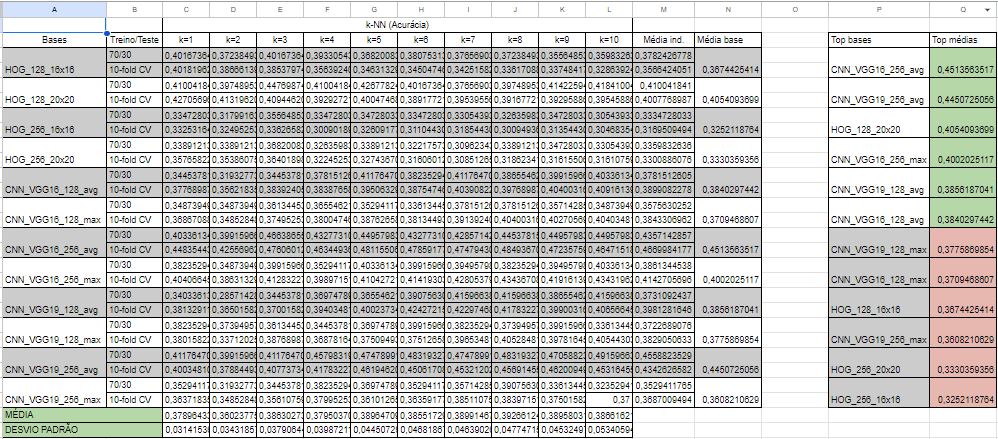

## Depois do PCA

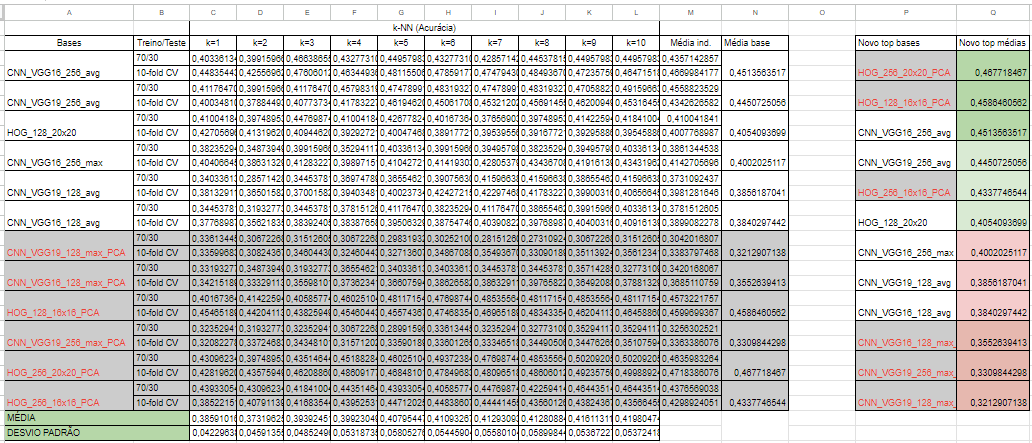

# Salvando CNNs para CSVs

In [106]:
cnn_vgg16_128_avg.to_csv('/content/CSVs/cnn_VGG16_avg_128.csv', index=False)

cnn_vgg16_128_max.to_csv('/content/CSVs/cnn_VGG16_max_128.csv', index=False)

cnn_vgg16_256_avg.to_csv('/content/CSVs/cnn_VGG16_avg_256.csv', index=False)

cnn_vgg16_256_max.to_csv('/content/CSVs/cnn_VGG16_max_256.csv', index=False)

cnn_vgg19_128_avg.to_csv('/content/CSVs/cnn_VGG19_avg_128.csv', index=False)

cnn_vgg19_128_max.to_csv('/content/CSVs/cnn_VGG19_max_128.csv', index=False)

cnn_vgg19_256_avg.to_csv('/content/CSVs/cnn_VGG19_avg_256.csv', index=False)

cnn_vgg19_256_max.to_csv('/content/CSVs/cnn_VGG19_max_256.csv', index=False)